In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-v0_8')  # apenas deixa os gráficos mais bonitos

In [2]:
caminho = '../data/processed/dados_limpos_para_analise.csv'
df = pd.read_csv(caminho)

df.head()

,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,rating,...,release_month_December,release_month_February,release_month_January,release_month_July,release_month_June,release_month_March,release_month_May,release_month_November,release_month_October,release_month_September
0,A98,855,16,128,108,6000,6.6,33,1,3.8,...,False,True,False,False,False,False,False,False,False,False
1,11 Pro+,618,6,128,64,4500,6.9,100,1,4.4,...,False,False,False,False,False,False,False,False,False,False
2,Redmi Note 14 Pro,258,16,64,64,4000,6.8,44,1,4.1,...,False,False,False,False,False,True,False,False,False,False
3,V29e,837,6,512,48,4500,6.0,65,1,4.1,...,False,False,False,False,False,False,False,False,False,False
4,iPhone 16 Pro Max,335,12,128,200,5000,6.9,100,1,3.5,...,False,True,False,False,False,False,False,False,False,False


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   model                          1000 non-null   object 
 1   price_usd                      1000 non-null   int64  
 2   ram_gb                         1000 non-null   int64  
 3   storage_gb                     1000 non-null   int64  
 4   camera_mp                      1000 non-null   int64  
 5   battery_mah                    1000 non-null   int64  
 6   display_size_inch              1000 non-null   float64
 7   charging_watt                  1000 non-null   int64  
 8   5g_support                     1000 non-null   int64  
 9   rating                         1000 non-null   float64
 10  year                           1000 non-null   int64  
 11  brand_Google                   1000 non-null   bool   
 12  brand_Infinix                  1000 non-null   bo

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,rating,year
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,813.478000,9.17200,402.880000,83.534000,5012.000000,6.380600,63.791000,0.503000,4.229900,2025.0
std,411.708367,4.32633,349.405893,62.504958,711.591429,0.496841,36.333751,0.500241,0.439965,0.0
min,101.000000,4.00000,64.000000,12.000000,4000.000000,5.500000,18.000000,0.000000,3.500000,2025.0
25%,449.250000,6.00000,128.000000,48.000000,4500.000000,6.000000,33.000000,0.000000,3.800000,2025.0
50%,822.000000,8.00000,256.000000,64.000000,5000.000000,6.400000,65.000000,1.000000,4.200000,2025.0
75%,1166.250000,12.00000,512.000000,108.000000,5500.000000,6.800000,100.000000,1.000000,4.600000,2025.0
max,1499.000000,16.00000,1024.000000,200.000000,6000.000000,7.200000,120.000000,1.000000,5.000000,2025.0


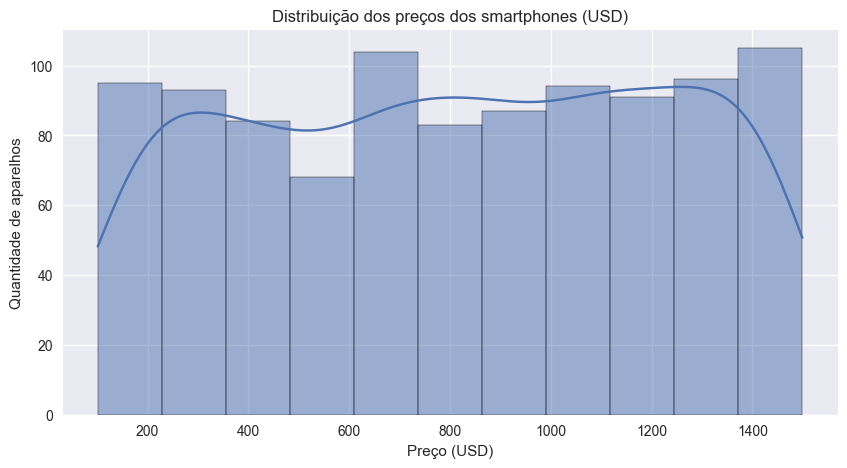

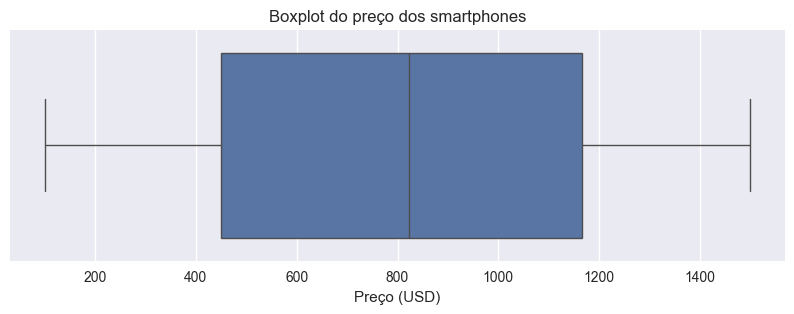

In [ ]:
# Distribuição do preço (Histograma + KDE)
plt.figure(figsize=(10,5))
sns.histplot(df['price_usd'], kde=True)
plt.title('Distribuição dos preços dos smartphones (USD)')
plt.xlabel('Preço (USD)')
plt.ylabel('Quantidade de aparelhos')
plt.savefig('../figuras/analise_exploratoria/preco_hist.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot do preço
plt.figure(figsize=(10,3))
sns.boxplot(x=df['price_usd'])
plt.title('Boxplot do preço dos smartphones')
plt.xlabel('Preço (USD)')
plt.savefig('../figuras/analise_exploratoria/NOME_DO_ARQUIVO.png', dpi=300, bbox_inches='tight')
plt.show()


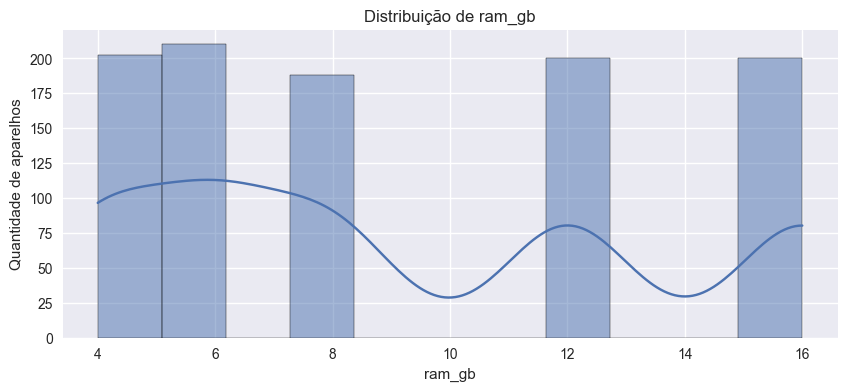

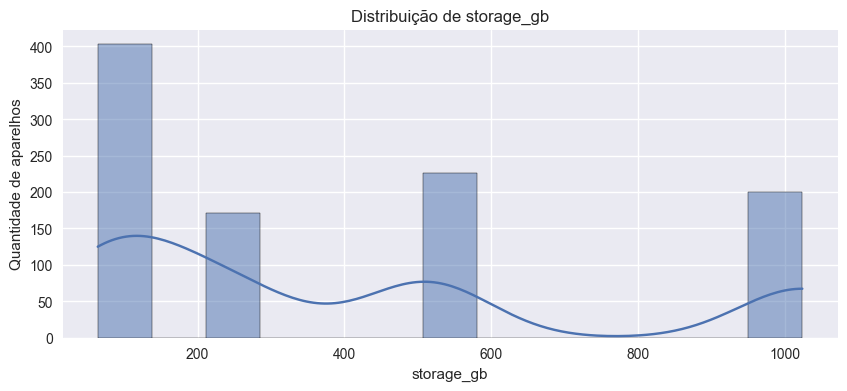

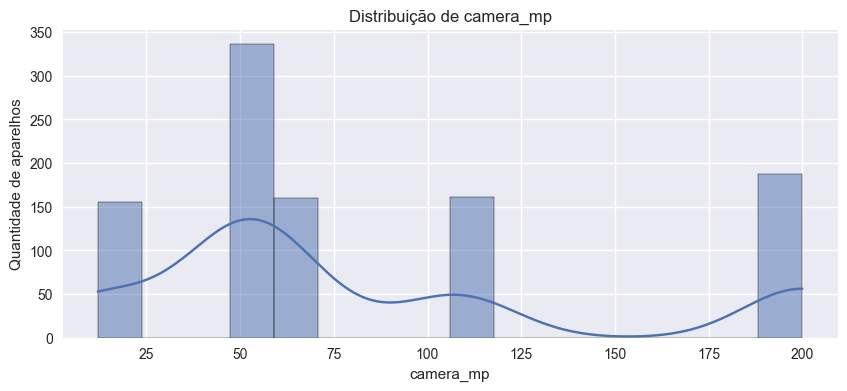

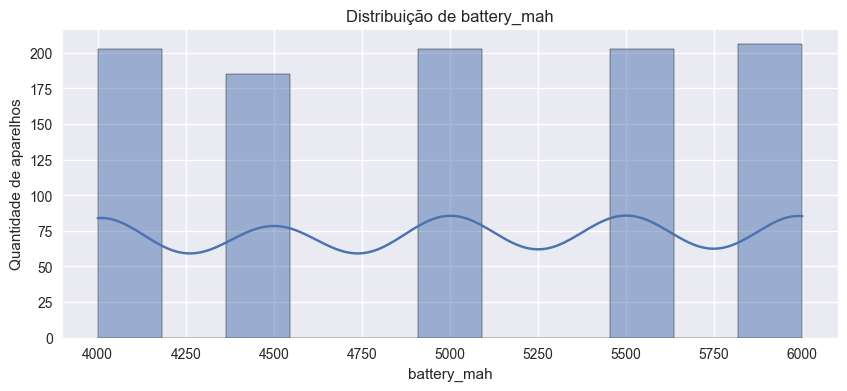

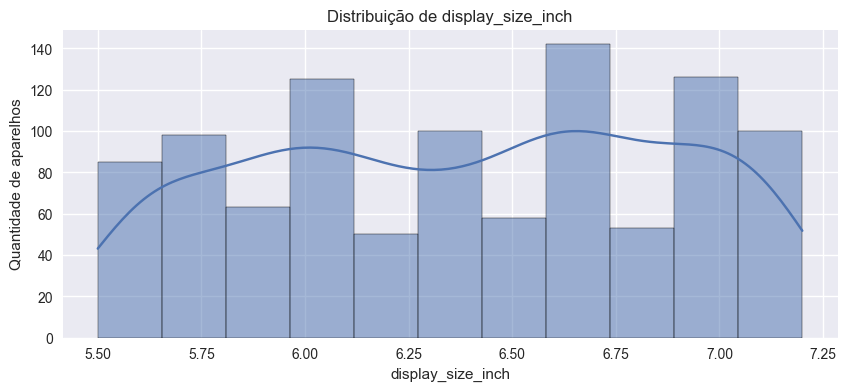

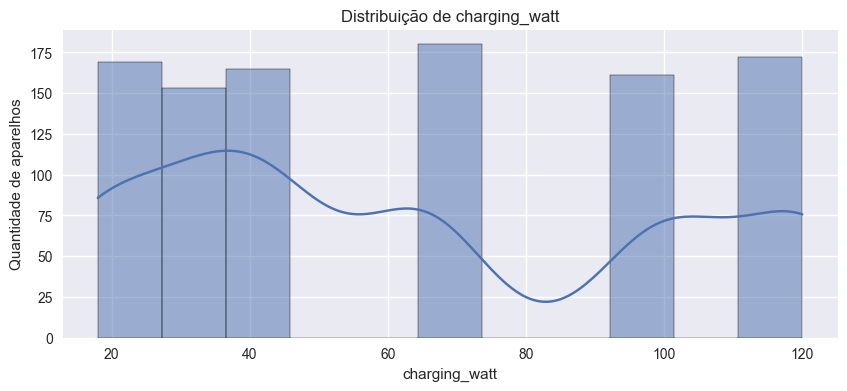

In [5]:
variaveis = ['ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt']

for col in variaveis:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Quantidade de aparelhos')
    plt.show()


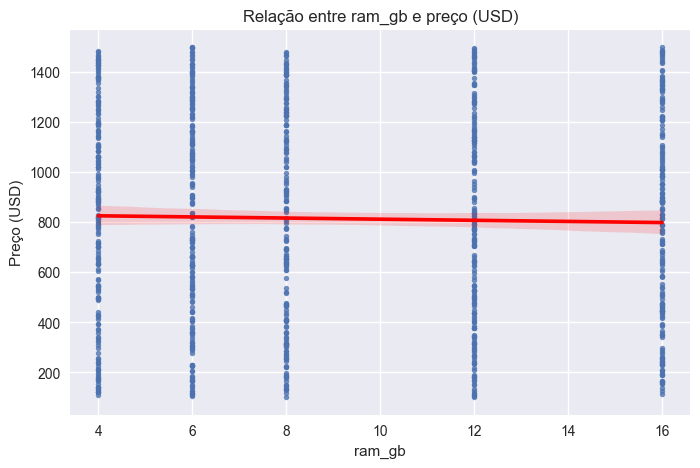

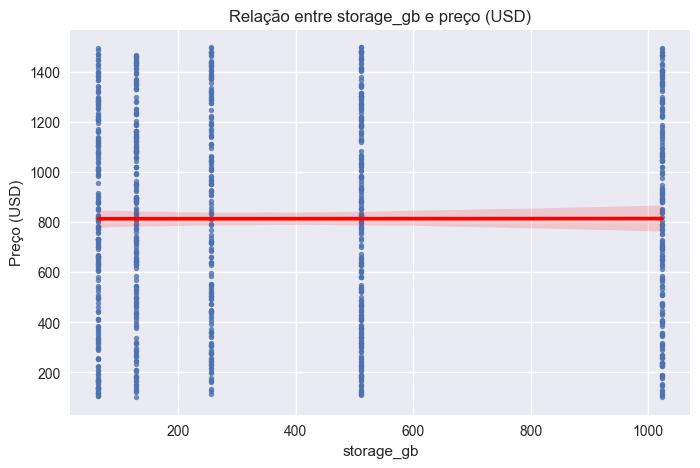

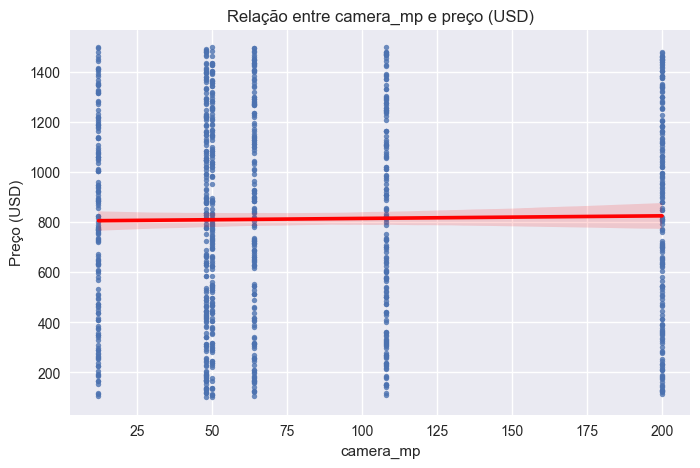

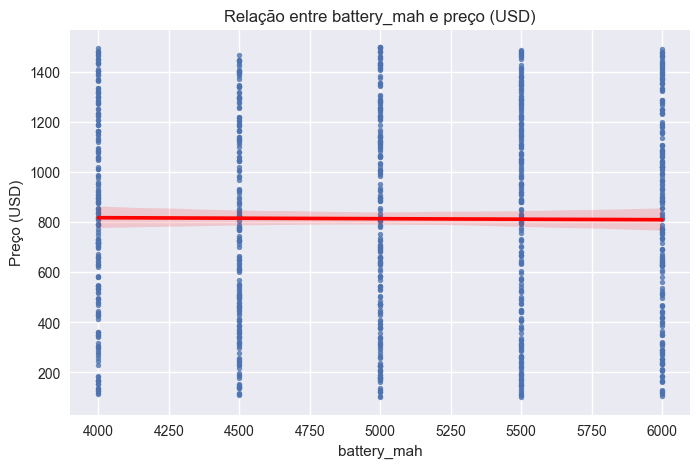

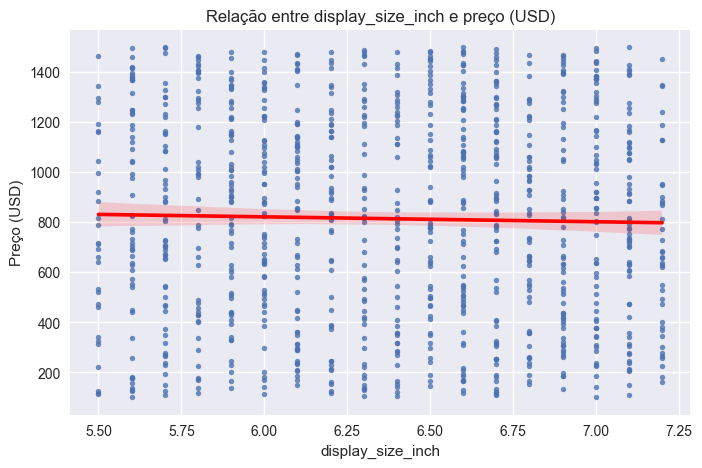

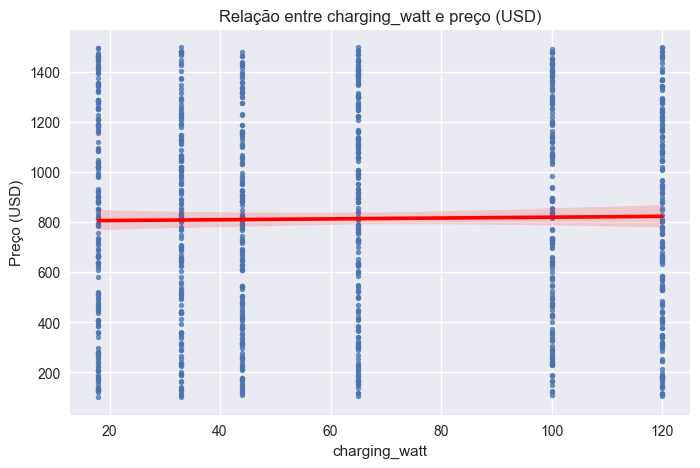

In [6]:
variaveis_rel = ['ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt']

for col in variaveis_rel:
    plt.figure(figsize=(8,5))
    sns.regplot(x=df[col], y=df['price_usd'], scatter_kws={'s':15}, line_kws={'color':'red'})
    plt.title(f'Relação entre {col} e preço (USD)')
    plt.xlabel(col)
    plt.ylabel('Preço (USD)')
    plt.show()


In [7]:
preco_5g = df.groupby('5g_support')['price_usd'].mean().reset_index()
preco_5g['5g_support'] = preco_5g['5g_support'].map({0: 'Sem 5G', 1: 'Com 5G'})
preco_5g

,5g_support,price_usd
0,Sem 5G,821.832998
1,Com 5G,805.222664


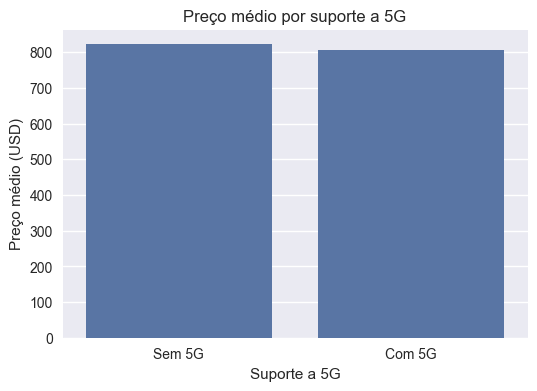

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(data=preco_5g, x='5g_support', y='price_usd')
plt.title('Preço médio por suporte a 5G')
plt.xlabel('Suporte a 5G')
plt.ylabel('Preço médio (USD)')
plt.show()


In [17]:
preco_marca = df.groupby('brand')['price_usd'].mean().sort_values(ascending=False)
preco_marca

brand
Infinix    839.171429
Xiaomi     827.736842
Oppo       826.327273
Google     821.318386
OnePlus    812.250000
Vivo       807.901639
Samsung    791.723810
Realme     771.780952
Name: price_usd, dtype: float64

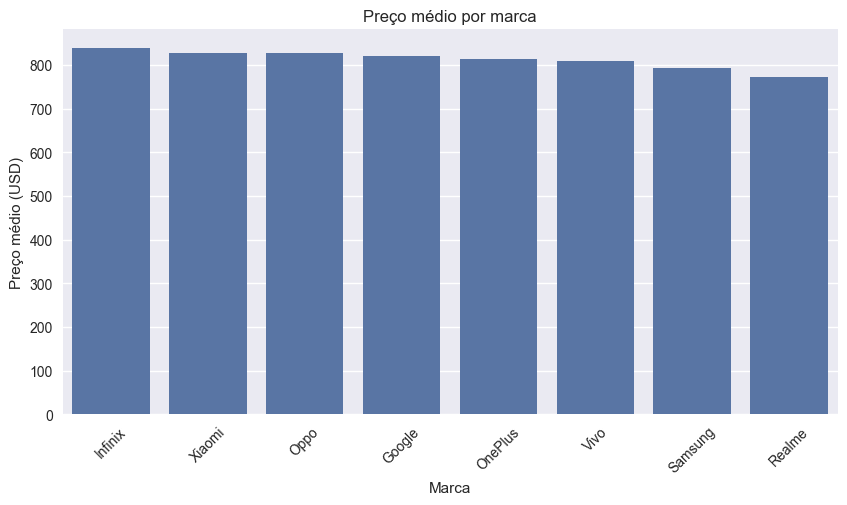

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=preco_marca.index, y=preco_marca.values)
plt.title('Preço médio por marca')
plt.xlabel('Marca')
plt.ylabel('Preço médio (USD)')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Selecionar apenas variáveis numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
corr = numericas.corr()

corr

,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,rating,year
price_usd,1.000000,-0.023628,0.000730,0.015682,-0.006909,-0.023611,0.014869,-0.020182,-0.001010,NaN
ram_gb,-0.023628,1.000000,0.013488,0.011987,0.024691,0.003696,0.001560,0.009474,-0.060605,NaN
storage_gb,0.000730,0.013488,1.000000,0.030576,-0.026807,0.012260,0.050683,0.009755,0.028872,NaN
camera_mp,0.015682,0.011987,0.030576,1.000000,0.004402,-0.057576,0.008465,-0.000756,0.032554,NaN
battery_mah,-0.006909,0.024691,-0.026807,0.004402,1.000000,0.013966,-0.003426,0.025207,0.011322,NaN
display_size_inch,-0.023611,0.003696,0.012260,-0.057576,0.013966,1.000000,0.053701,0.023191,0.011403,NaN
charging_watt,0.014869,0.001560,0.050683,0.008465,-0.003426,0.053701,1.000000,0.000007,0.032803,NaN
5g_support,-0.020182,0.009474,0.009755,-0.000756,0.025207,0.023191,0.000007,1.000000,-0.032473,NaN
rating,-0.001010,-0.060605,0.028872,0.032554,0.011322,0.011403,0.032803,-0.032473,1.000000,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


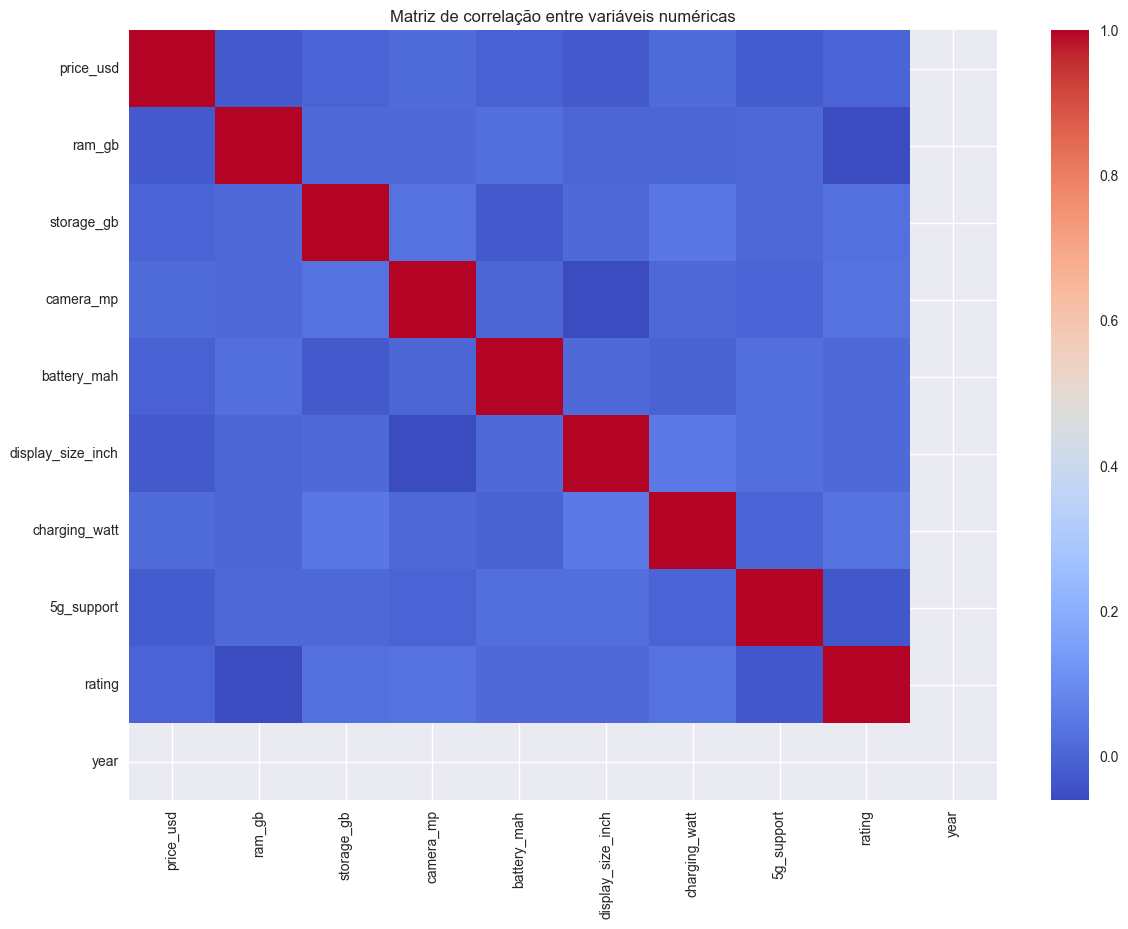

In [20]:
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de correlação entre variáveis numéricas')
plt.show()

In [21]:
corr_com_preco = corr['price_usd'].sort_values(ascending=False)
corr_com_preco

price_usd            1.000000
camera_mp            0.015682
charging_watt        0.014869
storage_gb           0.000730
rating              -0.001010
battery_mah         -0.006909
5g_support          -0.020182
display_size_inch   -0.023611
ram_gb              -0.023628
year                      NaN
Name: price_usd, dtype: float64

In [22]:
preco_marca


brand
Infinix    839.171429
Xiaomi     827.736842
Oppo       826.327273
Google     821.318386
OnePlus    812.250000
Vivo       807.901639
Samsung    791.723810
Realme     771.780952
Name: price_usd, dtype: float64